### **Data Cleaning---FIFA 2021 Raw/Messy Dataset**

**Import Relevant Libraries**

In [204]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import re
from datetime import datetime
import plotly.express as px

In [205]:
data = pd.read_csv(r"D:\Data Analytics\Self-Projects\tested fifa.csv", low_memory=False)
df = data.copy()

In [206]:
df.head()

,ID,Name,LongName,photoUrl,playerUrl,Nationality,Age,↓OVA,POT,Club,...,A/W,D/W,IR,PAC,SHO,PAS,DRI,DEF,PHY,Hits
0,158023,L. Messi,Lionel Messi,https://cdn.sofifa.com/players/158/023/21_60.png,http://sofifa.com/player/158023/lionel-messi/2...,Argentina,33,93,93,\n\n\n\nFC Barcelona,...,Medium,Low,5 ★,85,92,91,95,38,65,771
1,20801,Cristiano Ronaldo,C. Ronaldo dos Santos Aveiro,https://cdn.sofifa.com/players/020/801/21_60.png,http://sofifa.com/player/20801/c-ronaldo-dos-s...,Portugal,35,92,92,\n\n\n\nJuventus,...,High,Low,5 ★,89,93,81,89,35,77,562
2,200389,J. Oblak,Jan Oblak,https://cdn.sofifa.com/players/200/389/21_60.png,http://sofifa.com/player/200389/jan-oblak/210006/,Slovenia,27,91,93,\n\n\n\nAtlético Madrid,...,Medium,Medium,3 ★,87,92,78,90,52,90,150
3,192985,K. De Bruyne,Kevin De Bruyne,https://cdn.sofifa.com/players/192/985/21_60.png,http://sofifa.com/player/192985/kevin-de-bruyn...,Belgium,29,91,91,\n\n\n\nManchester City,...,High,High,4 ★,76,86,93,88,64,78,207
4,190871,Neymar Jr,Neymar da Silva Santos Jr.,https://cdn.sofifa.com/players/190/871/21_60.png,http://sofifa.com/player/190871/neymar-da-silv...,Brazil,28,91,91,\n\n\n\nParis Saint-Germain,...,High,Medium,5 ★,91,85,86,94,36,59,595


In [207]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18979 entries, 0 to 18978
Data columns (total 77 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   ID                18979 non-null  int64 
 1   Name              18979 non-null  object
 2   LongName          18979 non-null  object
 3   photoUrl          18979 non-null  object
 4   playerUrl         18979 non-null  object
 5   Nationality       18979 non-null  object
 6   Age               18979 non-null  int64 
 7   ↓OVA              18979 non-null  int64 
 8   POT               18979 non-null  int64 
 9   Club              18979 non-null  object
 10  Contract          18979 non-null  object
 11  Positions         18979 non-null  object
 12  Height            18979 non-null  object
 13  Weight            18979 non-null  object
 14  Preferred Foot    18979 non-null  object
 15  BOV               18979 non-null  int64 
 16  Best Position     18979 non-null  object
 17  Joined      

In [208]:
df.columns

Index(['ID', 'Name', 'LongName', 'photoUrl', 'playerUrl', 'Nationality', 'Age',
       '↓OVA', 'POT', 'Club', 'Contract', 'Positions', 'Height', 'Weight',
       'Preferred Foot', 'BOV', 'Best Position', 'Joined', 'Loan Date End',
       'Value', 'Wage', 'Release Clause', 'Attacking', 'Crossing', 'Finishing',
       'Heading Accuracy', 'Short Passing', 'Volleys', 'Skill', 'Dribbling',
       'Curve', 'FK Accuracy', 'Long Passing', 'Ball Control', 'Movement',
       'Acceleration', 'Sprint Speed', 'Agility', 'Reactions', 'Balance',
       'Power', 'Shot Power', 'Jumping', 'Stamina', 'Strength', 'Long Shots',
       'Mentality', 'Aggression', 'Interceptions', 'Positioning', 'Vision',
       'Penalties', 'Composure', 'Defending', 'Marking', 'Standing Tackle',
       'Sliding Tackle', 'Goalkeeping', 'GK Diving', 'GK Handling',
       'GK Kicking', 'GK Positioning', 'GK Reflexes', 'Total Stats',
       'Base Stats', 'W/F', 'SM', 'A/W', 'D/W', 'IR', 'PAC', 'SHO', 'PAS',
       'DRI', 'DEF', 

**Dropping the unnecessary Columns**

In [209]:
df.drop(columns = ['photoUrl','playerUrl','Loan Date End','Name'], inplace = True)
# df

**Converting Height Column into Numeric and all data into cm**

In [210]:
def convert_height(height):
    feet_inches_pattern = re.compile(r'(\d)\'(\d+)"')

    feet_inches_match = feet_inches_pattern.match(height)
    if feet_inches_match:
        feet = int(feet_inches_match.group(1))
        inches = int(feet_inches_match.group(2))
        cm = feet * 30.48 + inches * 2.54
        return cm

    cm_pattern = re.compile(r'(\d+)cm')
    cm_match = cm_pattern.match(height)
    if cm_match:
        return int(cm_match.group(1))

    try:
        return float(height)
    except ValueError:
        return None

df['Height'] = df['Height'].apply(convert_height)

In [211]:
df['Height'].head()

0    170.0
1    187.0
2    188.0
3    181.0
4    175.0
Name: Height, dtype: float64

**Converting Weight Column into Numeric and all the  data into kg**

In [212]:
def convert_weight(weight):
    kg_pattern = re.compile(r'(\d+)kg')
    kg_match = kg_pattern.match(weight)
    if kg_match:
        return int(kg_match.group(1))

    lbs_pattern = re.compile(r'(\d+)lbs')
    lbs_match = lbs_pattern.match(weight)
    if lbs_match:
        lbs = int(lbs_match.group(1))
        kg = lbs * 0.453592  
        return round(kg, 2)  

    try:
        return float(weight)
    except ValueError:
        return None

df['Weight'] = df['Weight'].apply(convert_weight)


In [213]:
df['Weight'].head()

0    72.0
1    83.0
2    87.0
3    70.0
4    68.0
Name: Weight, dtype: float64

**Remove the unnecessary newline characters from all columns that have them.**

In [214]:
def remove_newlines(text):
    if isinstance(text, str):
        return text.replace('\n', ' ')
    return text

df = df.applymap(remove_newlines)


**Convert 'Value' format to numeric**

In [215]:
def convert_value(value):
    if value.endswith('M'):
        return float(value[1:-1]) * 1000000
    elif value.endswith('K'):
        return float(value[1:-1]) * 1000
    elif value == '€0':
        return 0
    else:
        return float(value[1:])

df['Value'] = df['Value'].apply(convert_value)


In [216]:
print(df['Value'].head())

0    103500000.0
1     63000000.0
2    120000000.0
3    129000000.0
4    132000000.0
Name: Value, dtype: float64


**Convert 'Wage' format to numeric**

In [217]:
def convert_value(value):
    if value.endswith('M'):
        return float(value[1:-1]) * 1000000
    elif value.endswith('K'):
        return float(value[1:-1]) * 1000
    elif value == '€0':
        return 0
    else:
        return float(value[1:])

df['Wage'] = df['Wage'].apply(convert_value)


In [218]:
print(df['Wage'].head())

0    560000.0
1    220000.0
2    125000.0
3    370000.0
4    270000.0
Name: Wage, dtype: float64


**Convert 'Clause' format to numeric**

In [219]:
def convert_value(value):
    if value.endswith('M'):
        return float(value[1:-1]) * 1000000
    elif value.endswith('K'):
        return float(value[1:-1]) * 1000
    elif value == '€0':
        return 0
    else:
        return float(value[1:])

df['Release Clause'] = df['Release Clause'].apply(convert_value)


In [220]:
print(df['Release Clause'].head())

0    138400000.0
1     75900000.0
2    159400000.0
3    161000000.0
4    166500000.0
Name: Release Clause, dtype: float64


**Find columns with 'star' characters**

In [221]:
columns_with_stars = []
for col in df.columns:
    if df[col].apply(lambda x: isinstance(x, str) and '*' in x).any():
        columns_with_stars.append(col)

print("Columns with star characters:", columns_with_stars)


Columns with star characters: []


**Hence, There are not any.**

**Convert 'Hits' column to float64 and replace nulls with zeros**

In [222]:
df['Hits'] = pd.to_numeric(df['Hits'], errors='coerce').fillna(0)

## **Data Visualization/Exploration**

**Separating the Joined Column into Year, Month and Day Columns**

In [223]:
df['Joined'] = pd.to_datetime(df['Joined'])

df['Year'] = df['Joined'].dt.year
df['Month'] = df['Joined'].dt.month
df['Day'] = df['Joined'].dt.day

columns_to_display = ['Joined', 'Day', 'Month', 'Year']
formatted_df = df[columns_to_display].copy()

formatted_df['Joined'] = formatted_df['Joined'].dt.strftime('%Y-%m-%d')

print(formatted_df.to_string(index=False))


    Joined  Day  Month  Year
2004-07-01    1      7  2004
2018-07-10   10      7  2018
2014-07-16   16      7  2014
2015-08-30   30      8  2015
2017-08-03    3      8  2017
2014-07-01    1      7  2014
2017-07-01    1      7  2017
2018-07-19   19      7  2018
2018-07-01    1      7  2018
2014-07-01    1      7  2014
2018-01-01    1      1  2018
2016-07-01    1      7  2016
2013-07-11   11      7  2013
2018-08-09    9      8  2018
2011-07-01    1      7  2011
2009-07-09    9      7  2009
2005-08-01    1      8  2005
2011-07-28   28      7  2011
2015-07-14   14      7  2015
2016-07-16   16      7  2016
2015-07-01    1      7  2015
2015-07-01    1      7  2015
2017-07-01    1      7  2017
2010-07-01    1      7  2010
2012-07-01    1      7  2012
2014-07-01    1      7  2014
2019-07-01    1      7  2019
2014-07-17   17      7  2014
2019-07-12   12      7  2019
2017-08-31   31      8  2017
2015-10-07    7     10  2015
2017-07-01    1      7  2017
2017-07-21   21      7  2017
2018-01-30   3

**Checking All the players that have been playing for more than 10 years.**

In [224]:
df.rename(columns={'LongName': 'FullName'}, inplace=True)

In [225]:
df['Joined'] = pd.to_datetime(df['Joined'])

current_date = datetime.now()
df['YearsOfService'] = (current_date - df['Joined']).dt.days / 365.25

players_more_than_10_years = df[df['YearsOfService'] > 10]

selected_columns = ['ID', 'FullName','Nationality','Club', 'Joined']
selected_players = players_more_than_10_years[selected_columns]

pd.set_option('display.max_rows', None)  # Set to None to display all rows

print(selected_players.to_string(index=False))


    ID                          FullName          Nationality                                    Club     Joined
158023                      Lionel Messi            Argentina                            FC Barcelona 2004-07-01
200145 Carlos Henrique Venancio Casimiro               Brazil                             Real Madrid 2013-07-11
167495                      Manuel Neuer              Germany                       FC Bayern München 2011-07-01
165153                     Karim Benzema               France                             Real Madrid 2009-07-09
155862               Sergio Ramos García                Spain                             Real Madrid 2005-08-01
153079                     Sergio Agüero            Argentina                         Manchester City 2011-07-28
202126                        Harry Kane              England                       Tottenham Hotspur 2010-07-01
162835                  Samir Handanovič             Slovenia                                   

**Scatter PLot between Value and Wage**

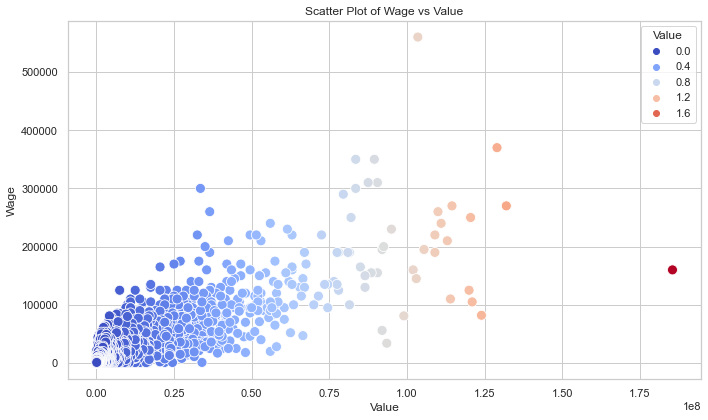

In [226]:
plt.figure(figsize=(10, 6))

sns.set(style="whitegrid")

sns.scatterplot(data=df, x='Value', y='Wage', hue='Value', palette='coolwarm', s=100)

plt.xlabel('Value')
plt.ylabel('Wage')
plt.title('Scatter Plot of Wage vs Value')

plt.tight_layout()
plt.show()


**Players with High Value and Low Wage**

In [227]:
high_value_players = df[df['Value'] > 1.75e8]

columns_to_print = ['FullName', 'Nationality', 'Club', 'Joined', 'Value', 'Wage']
high_value_info = high_value_players[columns_to_print]

print(high_value_info.to_string(index=False))


     FullName Nationality                    Club     Joined       Value     Wage
Kylian Mbappé      France     Paris Saint-Germain 2018-07-01 185500000.0 160000.0


**Hover Graph for some Nationalities with Mean of Attributes**

In [228]:
nationality_stats = df.groupby('Nationality').agg({'Age': 'mean', 'Value': 'mean'})

print(nationality_stats.head())


                   Age         Value
Nationality                         
Afghanistan  25.000000  1.150000e+06
Albania      24.680000  2.531600e+06
Algeria      27.094340  5.724245e+06
Andorra      30.000000  4.000000e+05
Angola       24.647059  3.219706e+06


In [229]:
import pandas as pd
import plotly.express as px

specific_nationalities = ['Egypt', 'France', 'Germany', 'Netherlands', 'Spain',
       'England', 'Scotland','Italy',
         'Switzerland', 'Serbia',
       'Morocco', 'Algeria', 'Denmark', 'Hungary',
       'Nigeria', 'Norway', 'Mexico', 'Austria',
       'Albania', 'Colombia', 'Greece', 'Finland',
        'Sweden']

filtered_df = df[df['Nationality'].isin(specific_nationalities)]

nationality_stats = filtered_df.groupby('Nationality').agg({
    'Age': 'mean', 'Value': 'mean', 'Wage': 'mean',
    'Height': 'mean', 'Weight': 'mean',
    'Total Stats': 'mean', 'Hits': 'mean'
}).reset_index()

fig = px.scatter(
    nationality_stats,
    x='Age', y='Value', size='Total Stats', text='Nationality', hover_name='Nationality',
    color='Wage', hover_data=['Height', 'Weight', 'Total Stats', 'Hits'],
    title='Average Attributes by Nationality',
    labels={'Age': 'Average Age', 'Value': 'Average Value', 'Wage': 'Average Wage'},
    size_max=40,
    color_continuous_scale='Viridis',
    template='plotly_dark'
)

fig.update_layout(
    xaxis=dict(title='Average Age'),
    yaxis=dict(title='Average Value'),
    hovermode='closest',
    showlegend=False,
    font=dict(family='Arial', size=12),
    xaxis_range=[18, 35],  
    yaxis_range=[10000000, 250000000], 
)

fig.show()


**Analysis of 'Best Position'**

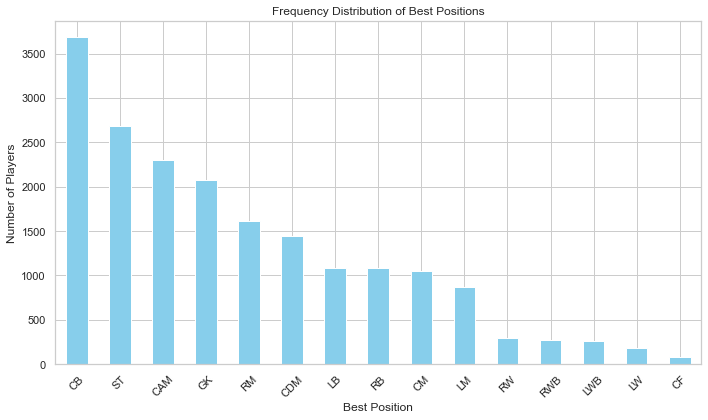

In [230]:
position_counts = df['Best Position'].value_counts()

plt.figure(figsize=(10, 6))
position_counts.plot(kind='bar', color='skyblue')
plt.xlabel('Best Position')
plt.ylabel('Number of Players')
plt.title('Frequency Distribution of Best Positions')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


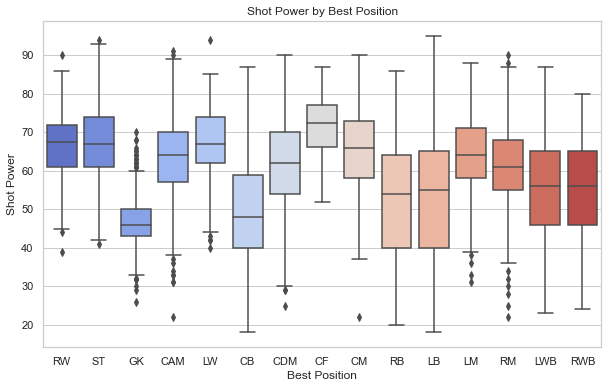

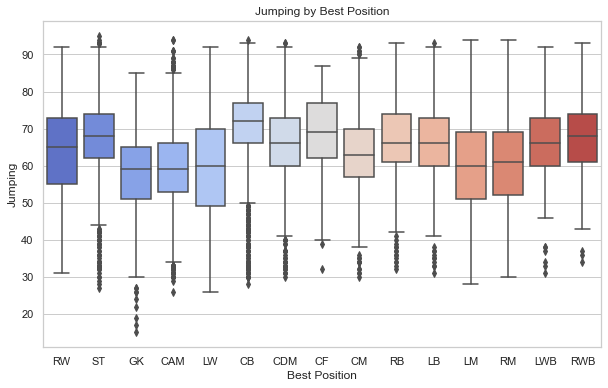

In [231]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='Best Position', y='Shot Power', palette='coolwarm')
plt.title('Shot Power by Best Position')
plt.ylabel('Shot Power')
plt.show()

plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='Best Position', y='Jumping', palette='coolwarm')
plt.title('Jumping by Best Position')
plt.ylabel('Jumping')
plt.show()


**Compare 'Total Stats' against specific attributes related to a player's position**

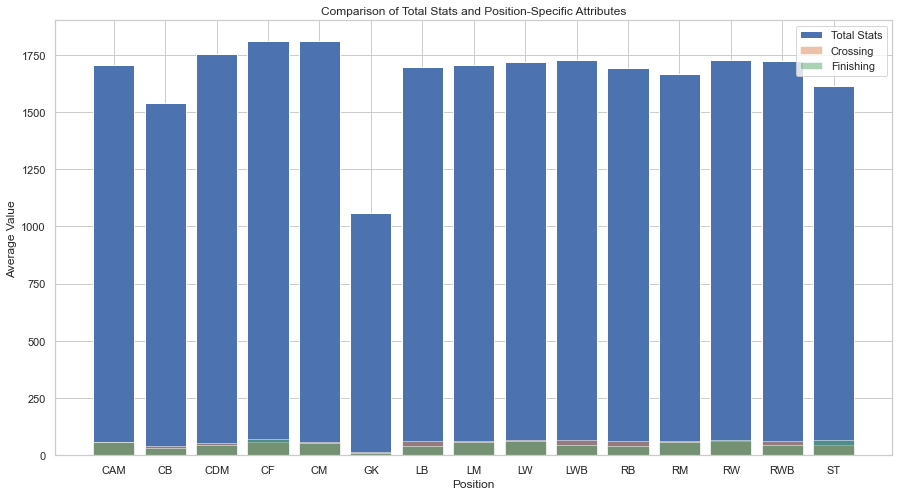

In [232]:
position_stats = df.groupby('Best Position').agg({
    'Total Stats': 'mean',
    'Crossing': 'mean',
    'Finishing': 'mean'
}).reset_index()

plt.figure(figsize=(15, 8))
plt.bar(position_stats['Best Position'], position_stats['Total Stats'], label='Total Stats')
plt.bar(position_stats['Best Position'], position_stats['Crossing'], label='Crossing', alpha=0.5)
plt.bar(position_stats['Best Position'], position_stats['Finishing'], label='Finishing', alpha=0.5)
plt.xlabel('Position')
plt.ylabel('Average Value')
plt.title('Comparison of Total Stats and Position-Specific Attributes')
plt.legend()
plt.show()


**Analyzing whether younger players tend to have lower 'Total Stats' compared to older, more experienced players.**

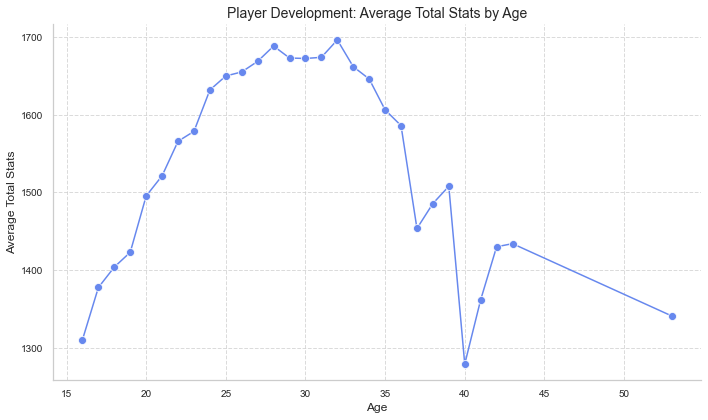

Age group with highest average Total Stats:
Age              32.000000
Total Stats    1695.955414
Name: 16, dtype: float64


In [233]:
age_grouped = df.groupby('Age')['Total Stats'].mean().reset_index()

sns.set(style="whitegrid")
sns.set_palette("coolwarm")

plt.figure(figsize=(10, 6))
sns.lineplot(data=age_grouped, x='Age', y='Total Stats', marker='o', markersize=8)
plt.xlabel('Age', fontsize=12)
plt.ylabel('Average Total Stats', fontsize=12)
plt.title('Player Development: Average Total Stats by Age', fontsize=14)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.grid(True, linestyle='--', alpha=0.7)
sns.despine()
plt.tight_layout()

plt.show()


# Group data by age and calculate average Total Stats
age_grouped = df.groupby('Age')['Total Stats'].mean().reset_index()

highest_avg_age = age_grouped.loc[age_grouped['Total Stats'].idxmax()]

print("Age group with highest average Total Stats:")
print(highest_avg_age)


In [234]:
# # Save the DataFrame to a CSV file
# df.to_csv('cleaned_fifa.csv', index=False)
